**LAB-02**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
df= pd.read_csv("C:/Users/91969/Downloads/train.csv")
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [3]:
df.shape

(209673, 8)

In [4]:
df.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [6]:
df.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

**Data Visualization**

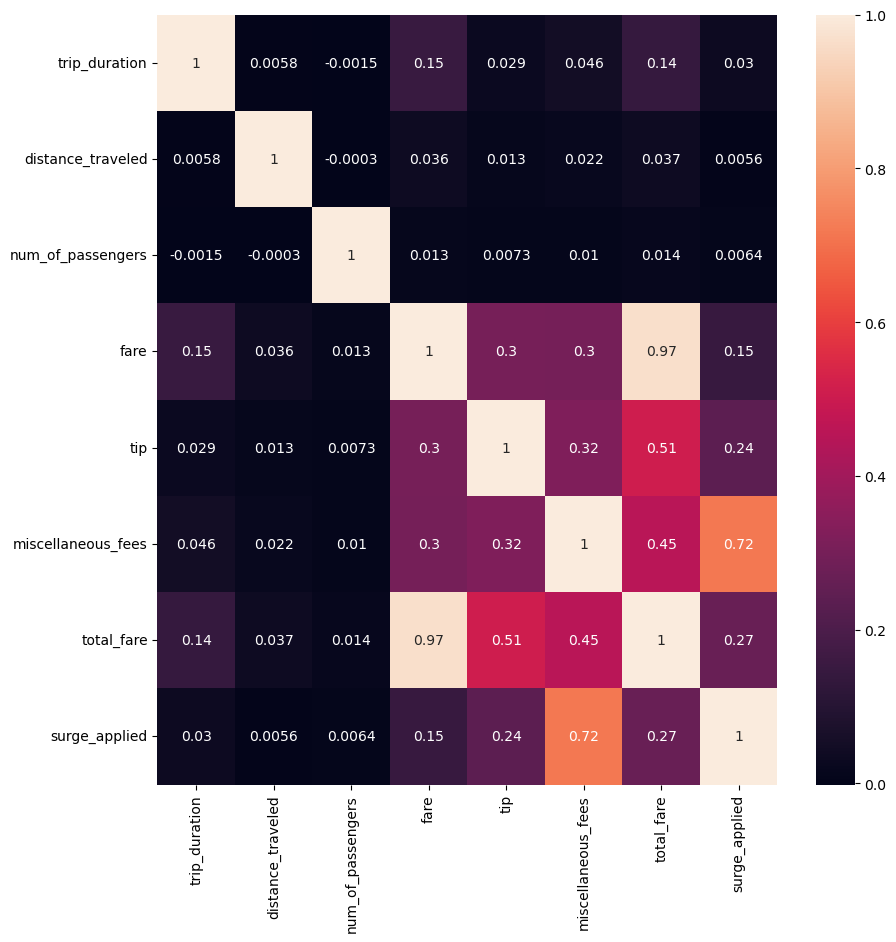

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

**Train and Test Split**

In [8]:
X = df.drop(columns='total_fare')
X

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,0
2,730.0,3.12,1.0,71.25,0,26.625,1
3,671.0,5.63,3.0,90.00,0,9.750,0
4,329.0,2.09,1.0,45.00,12,13.200,0
...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,0
209669,438.0,1.29,1.0,48.75,12,34.575,1
209670,571.0,2.82,1.0,63.75,0,6.000,0
209671,491.0,2.16,1.0,56.25,0,13.500,0


In [9]:
y = df['total_fare']
y

0         105.300
1         142.200
2          97.875
3          99.750
4          70.200
           ...   
209668    202.800
209669     95.325
209670     69.750
209671     69.750
209672    339.750
Name: total_fare, Length: 209673, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature Scaling**

In [11]:
STD = StandardScaler()
X_train_SD = STD.fit_transform(X_train)
X_test_SD = STD.transform(X_test)

**Model Training**

In [12]:
LR = LinearRegression()
LR.fit(X_train_SD, y_train)

LinearRegression()

In [13]:
y_hat = LR.predict(X_test_SD)

**Model Evaluation**


In [14]:
print("mse: ", mean_squared_error(y_hat, y_test))

mse:  3.473722029833163e-27


In [15]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
accuracy = regressor.score(X_test, y_test)
print("Accuracy:",(int(round(accuracy*100))))

Accuracy: 100


In [16]:
print("mae: ", mean_absolute_error(y_hat, y_test))

mae:  3.516311812818896e-14


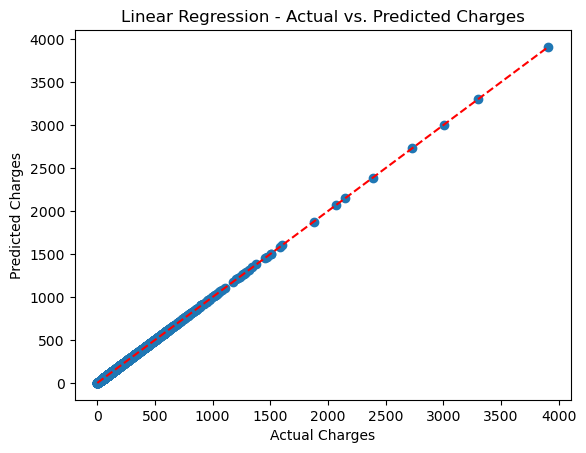

In [17]:
plt.scatter(y_test, y_hat)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression - Actual vs. Predicted Charges')
plt.show()

In [18]:
# To retrieve the intercept:
print(regressor.intercept_) 

-8.526512829121202e-14


In [19]:
# For retrieving the slope (coefficient of x):
print(regressor.coef_)

[ 3.68949741e-17 -1.39940559e-17 -1.49684473e-14  1.00000000e+00
  1.00000000e+00  1.00000000e+00  3.84079752e-16]


In [20]:
y_pred = regressor.predict(X_test)
y_pred 

array([ 66.   ,  51.   , 163.5  , ...,  63.75 , 236.625,  43.5  ])

In [22]:
# To compare the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
110587,66.000,66.000
43371,51.000,51.000
84310,163.500,163.500
160055,212.250,212.250
172966,126.000,126.000
...,...,...
1248,116.625,116.625
48614,306.450,306.450
201198,63.750,63.750
194357,236.625,236.625


In [21]:
import statistics
SSE=sum((y_pred-y_test)**2)
SST = sum((statistics.mean(y_pred)-y_test)**2)
R2=1-SSE/SST
R2

1.0